In [45]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\Joaquín Amat\Documents\GitHub\skforecast


In [46]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd
from skforecast.datasets import fetch_dataset
import matplotlib.pyplot as plt
from skforecast.plot import set_dark_theme
from skforecast.metrics import calculate_coverage
from skforecast.preprocessing import ConformalIntervalCalibrator
import warnings
warnings.filterwarnings('once')

# Simetric intervals

Coverage: 0.63


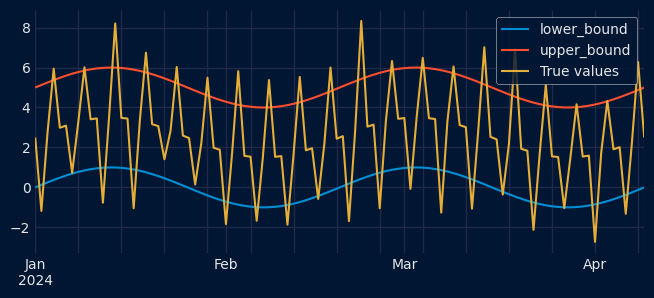

In [47]:
# Simulation of interval with coverage of 63%
# ==============================================================================
rng = np.random.default_rng(42)
interval = pd.DataFrame({
        'lower_bound': np.sin(np.linspace(0, 4 * np.pi, 100)),
        'upper_bound': np.sin(np.linspace(0, 4 * np.pi, 100)) + 5
    },
    index=pd.date_range(start='2024-01-01', periods=100, freq='D')
)
y_true = (interval['lower_bound'] + interval['upper_bound']) / 2
y_true.name = "series_1"
y_true.iloc[1::5] = interval.iloc[1::5, 0] - rng.normal(1, 1, 20)
y_true.iloc[3::5] = interval.iloc[1::5, 1] + rng.normal(1, 1, 20)

set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
interval.plot(ax=ax)
y_true.plot(ax=ax, label='True values')
ax.legend(loc='upper right');

coverage = calculate_coverage(
    y_true=y_true,
    lower_bound=interval["lower_bound"],
    upper_bound=interval["upper_bound"],
)
print(f"Coverage: {coverage:.2f}")

ConformalIntervalCalibrator 
Nominal coverage: 0.8 
Symetric interval: False 
Correction factor: {'series_1': 1.0342435333380045} 
Correction factor lower: {'series_1': -3.003174473168279} 
Correction factor upper: {'series_1': -1.9968255268317212} 
Fitted series: ['series_1'] 

Coverage: 0.00


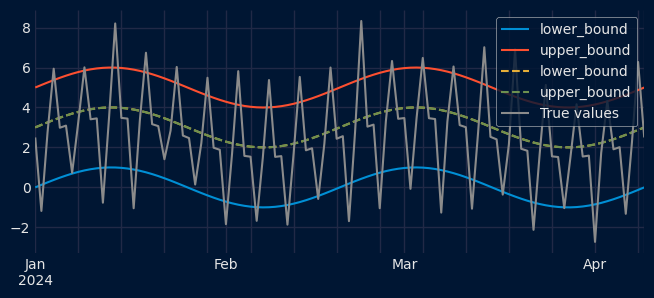

In [48]:
# Create and fit ConformalIntervalCalibrator
# ==============================================================================
calibrator = ConformalIntervalCalibrator(nominal_coverage=0.8, symetric_interval=False)
calibrator.fit(y_true=y_true, y_pred_interval=interval)
print(calibrator)
interval_calibrated = calibrator.transform(interval)

set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
interval.plot(ax=ax)
interval_calibrated.plot(ax=ax, linestyle='--')
y_true.plot(ax=ax, label='True values')
ax.legend(loc='upper right');
coverage = calculate_coverage(
    y_true=y_true,
    lower_bound=interval_calibrated["lower_bound"],
    upper_bound=interval_calibrated["upper_bound"],
)
print(f"Coverage: {coverage:.2f}")

# Asimetric intervals

Coverage: 0.63


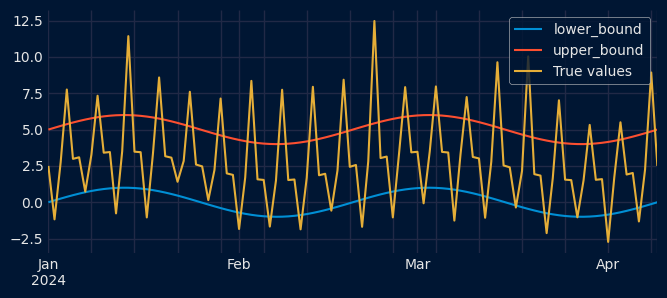

In [49]:
# Simulation of interval with coverage of 63%
# ==============================================================================
rng = np.random.default_rng(42)
interval = pd.DataFrame({
        'lower_bound': np.sin(np.linspace(0, 4 * np.pi, 100)),
        'upper_bound': np.sin(np.linspace(0, 4 * np.pi, 100)) + 5
    },
    index=pd.date_range(start='2024-01-01', periods=100, freq='D')
)
y_true = (interval['lower_bound'] + interval['upper_bound']) / 2
y_true.name = "series_1"
y_true.iloc[1::5] = interval.iloc[1::5, 0] - rng.normal(1, 1, 20)
y_true.iloc[3::5] = interval.iloc[1::5, 1] + rng.normal(3, 2, 20)

set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
interval.plot(ax=ax)
y_true.plot(ax=ax, label='True values')
ax.legend(loc='upper right');

coverage = calculate_coverage(
    y_true=y_true,
    lower_bound=interval["lower_bound"],
    upper_bound=interval["upper_bound"],
)
print(f"Coverage: {coverage:.2f}")

ConformalIntervalCalibrator 
Nominal coverage: 0.8 
Symetric interval: False 
Correction factor: {'series_1': 1.7979236086046133} 
Correction factor lower: {'series_1': -3.2382782300300343} 
Correction factor upper: {'series_1': -1.7617217699699659} 
Fitted series: ['series_1'] 

Coverage: 0.00


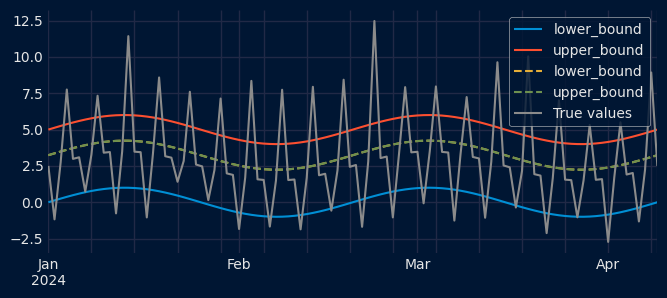

In [51]:
# Create and fit ConformalIntervalCalibrator
# ==============================================================================
calibrator = ConformalIntervalCalibrator(nominal_coverage=0.8, symetric_interval=False)
calibrator.fit(y_true=y_true, y_pred_interval=interval)
print(calibrator)
interval_calibrated = calibrator.transform(interval)

set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
interval.plot(ax=ax)
interval_calibrated.plot(ax=ax, linestyle='--')
y_true.plot(ax=ax, label='True values')
ax.legend(loc='upper right');

coverage = calculate_coverage(
    y_true=y_true,
    lower_bound=interval_calibrated["lower_bound"],
    upper_bound=interval_calibrated["upper_bound"],
)
print(f"Coverage: {coverage:.2f}")